<a href="https://colab.research.google.com/github/Ranjani94/Machine_Learning/blob/master/assignment2/Clustering_GMM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
data_link = 'https://raw.githubusercontent.com/Ranjani94/Machine_Learning/master/assignment1/AQ_Boston_Cam-Quincy.csv'
data = pd.read_csv(data_link)
data.head()

,['location','city','country','utc','local','parameter','value','unit','latitude','longitude','attribution'],Unnamed: 11,Unnamed: 12
0,['Portsmouth','Boston-Cambridge-Quincy','US','2020-02-09T18:00:00.000Z','2020-02-09T13:00:00-05:00','o3','0.035','ppm','43.075371','-70.748017',"'[{""name"":""US EPA AirNow""","url:""http://www.airnow.gov/""}","{""name"":""New Hampshire Dept. of Environmental ..."
1,['Odiorne State Park','Boston-Cambridge-Quincy','US','2020-02-09T18:00:00.000Z','2020-02-09T13:00:00-05:00','o3','0.038','ppm','43.045269','-70.713958',"'[{""name"":""US EPA AirNow""","url:""http://www.airnow.gov/""}","{""name"":""New Hampshire Dept. of Environmental ..."
2,['Portsmouth','Boston-Cambridge-Quincy','US','2020-02-09T18:00:00.000Z','2020-02-09T13:00:00-05:00','pm10','10','µg/m³','43.075371','-70.748017',"'[{""name"":""US EPA AirNow""","url:""http://www.airnow.gov/""}","{""name"":""New Hampshire Dept. of Environmental ..."
3,['Portsmouth','Boston-Cambridge-Quincy','US','2020-02-09T18:00:00.000Z','2020-02-09T13:00:00-05:00','pm25','4.8','µg/m³','43.075371','-70.748017',"'[{""name"":""US EPA AirNow""","url:""http://www.airnow.gov/""}","{""name"":""New Hampshire Dept. of Environmental ..."
4,['LYNN','Boston-Cambridge-Quincy','US','2020-02-09T17:00:00.000Z','2020-02-09T12:00:00-05:00','no2','0.008','ppm','42.474701','-70.971901',"'[{""name"":""US EPA AirNow""","url:""http://www.airnow.gov/""}","{""name"":""Massachusetts Dept. of Environmental ..."


In [11]:
data.dtypes

['location'        object
 'city'            object
 'country'         object
 'utc'             object
 'local'           object
 'parameter'       object
 'value'           object
 'unit'            object
 'latitude'        object
 'longitude'       object
 'attribution']    object
Unnamed: 11        object
Unnamed: 12        object
dtype: object

##Cleaning the data

In [12]:
data = data.apply(lambda s:s.str.replace('\'', "").str.replace('[', ""))
data.columns = data.columns.str.strip().str.replace('[', '').str.replace(']', '').str.replace('\'','')
data.drop(data.columns[[10,11,12]], axis=1, inplace=True)
data.head(5)

,location,city,country,utc,local,parameter,value,unit,latitude,longitude
0,Portsmouth,Boston-Cambridge-Quincy,US,2020-02-09T18:00:00.000Z,2020-02-09T13:00:00-05:00,o3,0.035,ppm,43.075371,-70.748017
1,Odiorne State Park,Boston-Cambridge-Quincy,US,2020-02-09T18:00:00.000Z,2020-02-09T13:00:00-05:00,o3,0.038,ppm,43.045269,-70.713958
2,Portsmouth,Boston-Cambridge-Quincy,US,2020-02-09T18:00:00.000Z,2020-02-09T13:00:00-05:00,pm10,10,µg/m³,43.075371,-70.748017
3,Portsmouth,Boston-Cambridge-Quincy,US,2020-02-09T18:00:00.000Z,2020-02-09T13:00:00-05:00,pm25,4.8,µg/m³,43.075371,-70.748017
4,LYNN,Boston-Cambridge-Quincy,US,2020-02-09T17:00:00.000Z,2020-02-09T12:00:00-05:00,no2,0.008,ppm,42.474701,-70.971901


In [13]:
c = data['location'].astype('category')
d = dict(enumerate(c.cat.categories))
data['location'] = c.cat.codes

import datetime
data['date'] = pd.DatetimeIndex(data['local']).date
data.head()

,location,city,country,utc,local,parameter,value,unit,latitude,longitude,date
0,7,Boston-Cambridge-Quincy,US,2020-02-09T18:00:00.000Z,2020-02-09T13:00:00-05:00,o3,0.035,ppm,43.075371,-70.748017,2020-02-09
1,6,Boston-Cambridge-Quincy,US,2020-02-09T18:00:00.000Z,2020-02-09T13:00:00-05:00,o3,0.038,ppm,43.045269,-70.713958,2020-02-09
2,7,Boston-Cambridge-Quincy,US,2020-02-09T18:00:00.000Z,2020-02-09T13:00:00-05:00,pm10,10,µg/m³,43.075371,-70.748017,2020-02-09
3,7,Boston-Cambridge-Quincy,US,2020-02-09T18:00:00.000Z,2020-02-09T13:00:00-05:00,pm25,4.8,µg/m³,43.075371,-70.748017,2020-02-09
4,5,Boston-Cambridge-Quincy,US,2020-02-09T17:00:00.000Z,2020-02-09T12:00:00-05:00,no2,0.008,ppm,42.474701,-70.971901,2020-02-09


In [14]:
data_loc = data[(data['location'] == 7)]
print(data_loc)

      location                      city  ...    longitude        date
0            7   Boston-Cambridge-Quincy  ...   -70.748017  2020-02-09
2            7   Boston-Cambridge-Quincy  ...   -70.748017  2020-02-09
3            7   Boston-Cambridge-Quincy  ...   -70.748017  2020-02-09
9            7   Boston-Cambridge-Quincy  ...   -70.748017  2020-02-09
11           7   Boston-Cambridge-Quincy  ...   -70.748017  2020-02-09
...        ...                       ...  ...          ...         ...
9977         7   Boston-Cambridge-Quincy  ...   -70.748017  2020-01-18
9978         7   Boston-Cambridge-Quincy  ...   -70.748017  2020-01-18
9986         7   Boston-Cambridge-Quincy  ...   -70.748017  2020-01-17
9987         7   Boston-Cambridge-Quincy  ...   -70.748017  2020-01-17
9995         7   Boston-Cambridge-Quincy  ...   -70.748017  2020-01-17

[2139 rows x 11 columns]


#Pivoting the table

In [16]:
#Pivoting the table
table = pd.pivot_table(data, values='value', index=['location', 'local','date'], columns=['parameter'], aggfunc=np.sum, fill_value=0)
table.reset_index(inplace=True)
table.columns=table.columns.str.strip()

def float_convert(var):
    table[var]=table[var].astype(float)
    
arr=['co','no2','o3','pm10','pm25','so2']
for i in arr:
    float_convert(i)
table.head()

parameter,location,local,date,co,no2,o3,pm10,pm25,so2
0,0,2020-01-17T23:00:00-05:00,2020-01-17,0.0,0.008,0.0,0.0,0.0,0.0
1,0,2020-01-18T00:00:00-05:00,2020-01-18,0.0,0.009,0.0,0.0,0.0,0.0
2,0,2020-01-18T01:00:00-05:00,2020-01-18,0.0,0.008,0.0,0.0,0.0,0.0
3,0,2020-01-18T02:00:00-05:00,2020-01-18,0.0,0.008,0.0,0.0,0.0,0.0
4,0,2020-01-18T03:00:00-05:00,2020-01-18,0.0,0.007,0.0,0.0,0.0,0.0


##Grouping by mean

In [17]:
AQI_table = table.groupby(table['date']).mean()
AQI_table.reset_index(inplace=True)
AQI_table.head(5)

parameter,date,location,co,no2,o3,pm10,pm25,so2
0,2020-01-17,3.142857,0.025714,0.003286,0.027857,0.000000,2.085714,0.000286
1,2020-01-18,3.142857,0.035476,0.006679,0.022405,1.630952,2.784524,0.000435
2,2020-01-19,3.473684,0.051513,0.006072,0.018553,2.046053,4.243421,0.000520
3,2020-01-20,3.149701,0.028443,0.003856,0.025341,2.143713,1.910180,0.000407
4,2020-01-21,3.142857,0.047798,0.008589,0.020762,2.464286,2.785714,0.000476


##Installing the Air_Quality_Index library

In [20]:
pip install python-aqi

  Created wheel for python-aqi: filename=python_aqi-0.6.1-cp36-none-any.whl size=9661 sha256=dd20b78d8d09bf8af53d41e05472085f9c9f0a11848772edd568fe95789ace26
  Stored in directory: /root/.cache/pip/wheels/19/d1/a3/e86a721d62c4ccb26cad2d0900d3c4cdf3f9848215882e0547
Successfully built python-aqi


In [30]:
import aqi

def cal_PM10aqi(value):
  PM10_aqi = aqi.to_iaqi(aqi.POLLUTANT_PM10, str(value))
  return PM10_aqi

def cal_PM25aqi(value):
  PM25_aqi = aqi.to_iaqi(aqi.POLLUTANT_PM25, str(value))
  return PM25_aqi

AQI_table['PM10_aqi'] = AQI_table.apply(lambda idx: cal_PM10aqi(idx['pm10']), axis=1)
AQI_table['PM25_aqi'] = AQI_table.apply(lambda idx: cal_PM25aqi(idx['pm25']), axis=1)
AQI_table.drop(['date'], axis=1,inplace=True)
MEAN_AQI = AQI_table
MEAN_AQI.head()

parameter,location,co,no2,o3,pm10,pm25,so2,PM10_aqi,PM25_aqi,cluster
0,3.142857,0.025714,0.003286,0.027857,0.000000,2.085714,0.000286,0,8,1
1,3.142857,0.035476,0.006679,0.022405,1.630952,2.784524,0.000435,1,11,1
2,3.473684,0.051513,0.006072,0.018553,2.046053,4.243421,0.000520,2,18,2
3,3.149701,0.028443,0.003856,0.025341,2.143713,1.910180,0.000407,2,8,1
4,3.142857,0.047798,0.008589,0.020762,2.464286,2.785714,0.000476,2,11,1


##Elbow Method

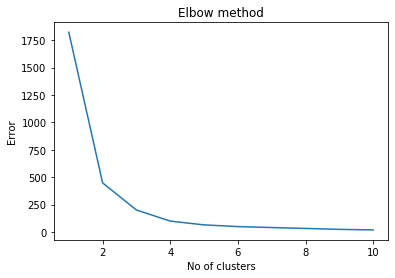

In [32]:
def elbow_method():
    Error =[]
    for i in range(1, 11):
        kmeans = KMeans(n_clusters = i).fit(MEAN_AQI)
        kmeans.fit(MEAN_AQI)
        Error.append(kmeans.inertia_)
    plt.plot(range(1, 11), Error)
    plt.title('Elbow method')
    plt.xlabel('No of clusters')
    plt.ylabel('Error')
    plt.show()

elbow_method()

##K-Means


In [36]:
#X = MEAN_AQI.iloc[:,1:].values
#print(X)
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
y = kmeans.fit_predict(MEAN_AQI.iloc[:,1:].values)
MEAN_AQI['cluster'] = y
MEAN_AQI.head()
#AQI_table.head()



parameter,location,co,no2,o3,pm10,pm25,so2,PM10_aqi,PM25_aqi,cluster
0,3.142857,0.025714,0.003286,0.027857,0.000000,2.085714,0.000286,0,8,1
1,3.142857,0.035476,0.006679,0.022405,1.630952,2.784524,0.000435,1,11,1
2,3.473684,0.051513,0.006072,0.018553,2.046053,4.243421,0.000520,2,18,0
3,3.149701,0.028443,0.003856,0.025341,2.143713,1.910180,0.000407,2,8,1
4,3.142857,0.047798,0.008589,0.020762,2.464286,2.785714,0.000476,2,11,1


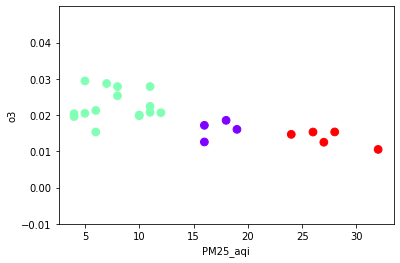

In [39]:
plt.scatter(MEAN_AQI['PM25_aqi'], MEAN_AQI['o3'], s=60, c=y, cmap='rainbow')
plt.xlabel("PM25_aqi")
plt.ylabel("o3")
plt.show()

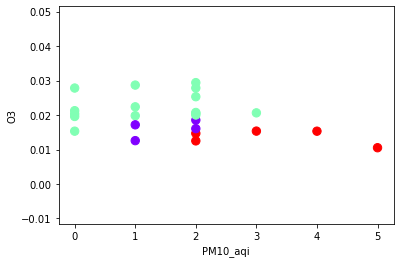

In [41]:
plt.scatter(MEAN_AQI['PM10_aqi'], MEAN_AQI['o3'], s=70, c=y, cmap='rainbow')
plt.xlabel('PM10_aqi')
plt.ylabel('O3')
plt.show()

##GMM_Clustering

In [42]:
from sklearn.mixture import GaussianMixture
MEAN_AQI.drop(['cluster'], axis=1,inplace=True)
gmm = GaussianMixture(n_components = 3 , covariance_type='spherical').fit(MEAN_AQI.iloc[:,1:].values)
y_gmm = gmm.predict(MEAN_AQI.iloc[:,1:].values)
MEAN_AQI['clusterGMM'] = y_gmm
MEAN_AQI.tail()

parameter,location,co,no2,o3,pm10,pm25,so2,PM10_aqi,PM25_aqi,clusterGMM
19,3.497326,0.032888,0.007572,0.020032,2.470588,2.497861,0.000540,2,10,0
20,3.500000,0.028906,0.006302,0.021281,0.916667,1.595312,0.000464,0,6,2
21,3.507853,0.032565,0.004853,0.019607,0.340314,0.935602,0.000497,0,4,2
22,3.500000,0.020208,0.001859,0.028714,1.171875,1.728125,0.000333,1,7,2
23,3.509615,0.031635,0.008067,0.020654,3.038462,2.973077,0.000413,3,12,0


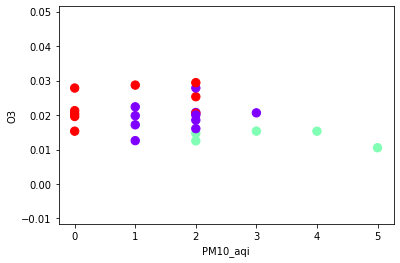

In [45]:
plt.scatter(MEAN_AQI['PM10_aqi'], MEAN_AQI['o3'], s=70, c=y_gmm, cmap='rainbow')
plt.xlabel('PM10_aqi')
plt.ylabel('O3')
plt.show()

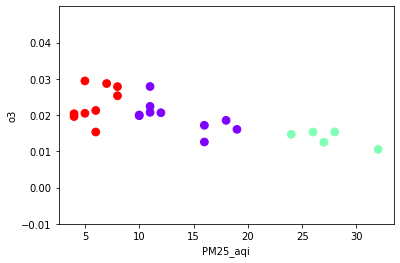

In [46]:
plt.scatter(MEAN_AQI['PM25_aqi'], MEAN_AQI['o3'], s=60, c=y_gmm, cmap='rainbow')
plt.xlabel("PM25_aqi")
plt.ylabel("o3")
plt.show()